/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


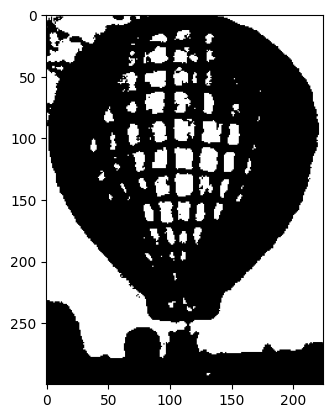

In [1]:
# entropy threshold
import matplotlib.pyplot as plt
from skimage import io, restoration
from skimage.filters.rank import entropy
from skimage.morphology import disk

img = io.imread("balloon.jpg", as_gray = True)
entropy_img = entropy(img, disk(3))
#plt.imshow(entropy_img, cmap='gray')

from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu

thresh= threshold_otsu(entropy_img)

binary = entropy_img <= thresh
plt.imshow(binary, cmap= 'gray')

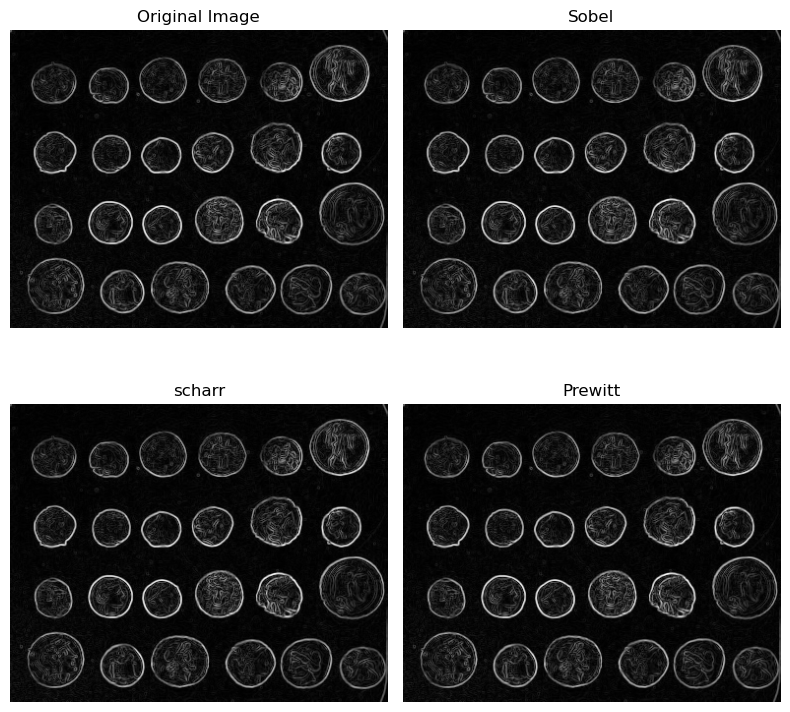

In [7]:
from skimage import io
from skimage import data
from matplotlib import pyplot as plt
from skimage.filters import roberts, sobel, scharr, prewitt

img = data.coins()

edge_roberts = roberts(img)
sobel_ = sobel(img)
sch_ = scharr(img)
prewitt_ = prewitt(img)

_,axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(sobel_, cmap = plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(sobel_, cmap = plt.cm.gray)
ax[1].set_title('Sobel')

ax[2].imshow(sobel_, cmap = plt.cm.gray)
ax[2].set_title('scharr')

ax[3].imshow(sobel_, cmap = plt.cm.gray)
ax[3].set_title('Prewitt')

for a in ax:
    a.axis('off')
    
plt.tight_layout();
plt.show()    

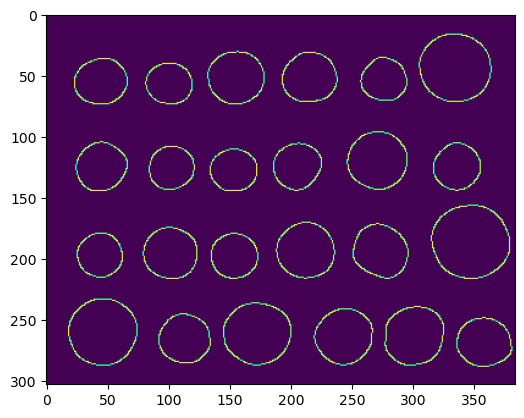

In [8]:
from skimage.feature import canny
edge_canny = canny(img, sigma=5)
plt.imshow(edge_canny)

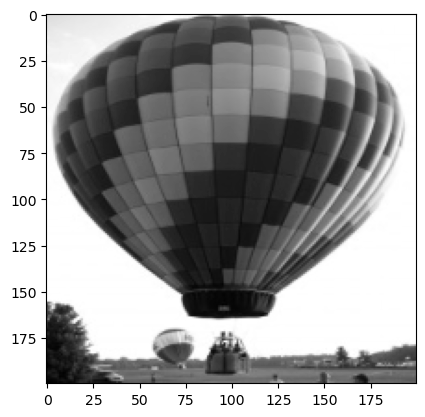

In [10]:
from skimage import io
from matplotlib import pyplot as plt

img = io.imread("balloon.jpg", as_gray = True)

from skimage.transform import rescale, resize, downscale_local_mean

rescaled_img = rescale(img, 1.0/2.0, anti_aliasing = True)
resized_img = resize(img, (200,200), anti_aliasing = True)
downscaled_img = downscale_local_mean(img, (4,3))
# plt.imshow(rescaled_img, cmap='gray')
plt.imshow(resized_img, cmap='gray')
# plt.imshow(downscaled_img, cmap= 'gray')

# Sklearn

In [3]:
from sklearn import svm
import pandas as pd
import math 

data = pd.read_csv('zoo.csv')
data.head(6)

from sklearn.model_selection import train_test_split

all_x = data.iloc[:, 1:17] ##all rows, features only, no labels
all_y = data.iloc[:, 17]  ##all rows, label only, no features

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

clf = svm.SVC()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

clf.predict(x_test[10:15])

##show what the correct answer is
y_test[10:15]

(75, 16) (26, 16) (75,) (26,)


87    2
43    2
85    7
34    4
49    1
Name: class_type, dtype: int64

### sci kit learn ဆိုတာ google summer project ကနေ ပေါ်ပေါက်လာတဲ့ machine learning library တစ်ခုဖြစ်ပါတယ်။ သူ့မှာ data set loading, processing matrix နဲ့ ml algorithm အများစုပါဝင်ပြီးသားဖြစ်ပါတယ်။ code line အနည်းငယ်ရေးရုံနဲ့ အသုံးပြုလို့ရပါတယ်။ ဒီနည်းလမ်းကို သုံးရင် ml algorithm တွေရဲ့ ရလာဒ်ကို လွယ်လွယ်ကူကူ မြင်သာစေမှာဖြစ်ပါတယ်။ ဥပမာကြည့်ရအောင် zoo ထဲက animals ၁၀၁ မျိုးရဲ့ data set က archive/zoo.csv မှာပါ။ သူ့ကို classify လုပ်ပေးရမှာက ပုံစံ ၇ မျိုးပါ။ သူ့ရဲ့ attribute နဲ့ value type တွေက ဒီလိုပါ။ final ကော်လံက class_type ဆိုတာ ကျတော်တို့ စိတ်ဝင်စားတဲ့ အဖြေပါ။


In [5]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

df = pd.read_csv('zoo.csv')
data.head(6)

data = data.sample(frac=1).reset_index(drop=True)
data_total_learn = data[data.columns[0]].size

data_train_frac = 0.6
split_index = math.floor(data_total_learn*data_train_frac)

train_data = data.iloc[:split_index]
eval_data = data.iloc[split_index:]

##sklearn သုံးပြီး အောက်ပါအတိုင်း အတိုချုံးရေးလို့ရပါတယ်။ ပထမ feature သက်သက် label သက်သက်ခွဲပါမယ်။ နောက် training နဲ့ testing ခွဲပါမယ်။

from sklearn.model_selection import train_test_split

all_x = df.iloc[:,1:17]
all_y = df.iloc[:, 17]

x_train, x_test, y_train, y_test = train_test_split(all_x,all_y)

# clf = svm.SVC()
# clf.fit(x_train, y_train)
# clf.predict(x_test[10:15])

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(x_train, y_train)
score_ = model.score(x_test,y_test)

predicted_ = model.predict(x_test[10:15])

check_y_test = y_test[10:15]

AttributeError: 'Flags' object has no attribute 'c_contiguous'

# sklearn with explain

sck-kit learn ဆိုတာ google summer project ကနေ ပေါ်ပေါ်က်လာတဲ့ machine learning library တစ်ခုဖြစ်ပါတယ်။ သူ့မှာ data set loading, processing matrix နဲ့ ml alogrithm အများစုပါ၀င်ပြီးသားပါ။ code line အနည်းငယ်ရေးရုံနဲ့ အသုံးပြုလို့ရပါတယ်။ ဒီနည်းလမ်းကိုသုံးရင် ml algorithm တွေရဲ့ ရလာဒ်ကို လွယ်လွယ်ကူကူ မြင်သာစေမှာပါ။ ဥပမာအနေနဲ့ zoo ထဲက animals 101 မျိုးရဲ့ data set က archive/zoo.csv မှာပါ။ သူ့ကို classify လုပ်ပေးရမှာက ပုံစံ ၇ မျိုးပါ။ သူ့ရဲ့ attribute နဲ့ value type တွေက ဒီလိုပါ, final column က class_type ဆိုတာက ကျွန်တော်တို့ စိတ်၀င်စားတဲ့အဖြေပါ။

In [ ]:
from sklean import svm
import pandas as pd
import math

In [ ]:
data = pd.read_csv('archive/zoo.csv')
data.head(6)

data ကို training လုပ်ဖို့နဲ့ evaluate (testing) လုပ်ဖို့ ခွဲပေးရမှာ sklearn မသုံးရင် ဒီလို ရေးရမှာပါ။

In [ ]:
## shuffle and split the dataset
## we don't need to use this anymore

data = data.sample(frac = 1).reset_index(drop = True)
data_total_len = data[data.columns[0]].size

data_train_frac = 0.6
split_index = math.floor(data_total_len*data_train_frac)

train_data = data.iloc[:split_index]
eval_data = data.iloc[split_index]

sklearn သုံးပြီး အောက်အတိုင်း အတိုချုံ့ရေးလို့ရပါတယ်။ ပထမ feature က သက်သက် label ခွဲပေးရုံ, နောက်မှ training နဲ့ testing ခွဲ

In [ ]:
from sklearn.model_selection import train_test_split

all_x = data.iloc[: , 1:17] # all rows, features only, no labels
all_y = data.iloc[: ,17]  # all rows, label only, no features

x_train, x_test, y_train, y_test = train_test_split(all_x, all_y)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

svm မသုံးပဲ တခြား ml algorithm ကိုလည်းသုံးလို့ရပါတယ်။ ပြီးရင် fit method နဲ့ trian ပေးပါ့မယ်။

In [ ]:
clf.score(x_test, y_test)

ပြီးရင်တော့ predict လုပ်ပြီး testing data ကိုခန့်မှန်းပါမယ်။

In [ ]:
clf.predict(x_test[10:15])

In [ ]:
# show what the correct answer is
y_test[10:15]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, Y= np.arrange(10).reshape((5, 2)), range(5)
print(X)
list(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33 , random_state = 42)

In [ ]:
X_train
Y_train
X_test
Y_test